In [29]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df = df.sort_values(by='price', ascending=True) #sort the data set to see the biggest channels first

df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
4593,4593,Willem Pijperstraat 39,156,4,1077 XL,30-1-2016,1000,house,5,12-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1954
7624,7624,Keizersgracht 466 *,189,4,1017 EG,17-9-2015,1000,house,7,7-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1820
4297,4297,Sophialaan 39 -H,277,5,1075 BM,16-1-2016,1000,apartment,6,2-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
8903,8903,Johannes Verhulststraat 218 II,185,5,1075 HG,20-3-2015,1000,apartment,6,21-9-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
7206,7206,Brouwersgracht 47 bov,164,2,1015 GB,4-7-2015,1000,apartment,7,22-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1647
539,539,Linnaeushof 19 -II,222,5,1098 KJ,15-5-2016,1000,apartment,7,30-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1931
6631,6631,Singel 326 -328,198,3,1016 AE,28-9-2015,1000,apartment,4,1-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
11160,11160,Larikslaan 15,205,4,1087 SC,12-3-2014,1000,house,7,17-2-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,2014
7199,7199,Singel 94 -B.,136,2,1015 AD,29-8-2015,1000,apartment,3,2-11-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
4082,4082,IJdok 97,140,2,1013 MM,26-11-2015,1000,apartment,3,19-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2012


In [3]:
df['price_t'] = df['price'] / 1000

df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_t
4593,4593,Willem Pijperstraat 39,156,4,1077 XL,30-1-2016,1000,house,5,12-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1954,1.0
7624,7624,Keizersgracht 466 *,189,4,1017 EG,17-9-2015,1000,house,7,7-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1820,1.0
4297,4297,Sophialaan 39 -H,277,5,1075 BM,16-1-2016,1000,apartment,6,2-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,1.0
8903,8903,Johannes Verhulststraat 218 II,185,5,1075 HG,20-3-2015,1000,apartment,6,21-9-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,1.0
7206,7206,Brouwersgracht 47 bov,164,2,1015 GB,4-7-2015,1000,apartment,7,22-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1647,1.0
539,539,Linnaeushof 19 -II,222,5,1098 KJ,15-5-2016,1000,apartment,7,30-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1931,1.0
6631,6631,Singel 326 -328,198,3,1016 AE,28-9-2015,1000,apartment,4,1-12-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,1.0
11160,11160,Larikslaan 15,205,4,1087 SC,12-3-2014,1000,house,7,17-2-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,2014,1.0
7199,7199,Singel 94 -B.,136,2,1015 AD,29-8-2015,1000,apartment,3,2-11-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,1.0
4082,4082,IJdok 97,140,2,1013 MM,26-11-2015,1000,apartment,3,19-2-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2012,1.0


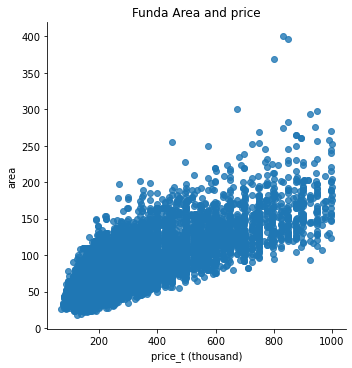

In [4]:
df = df.drop(df[(df.price_t < 10)].index)

sns.lmplot(x='price_t', y='area', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('price_t (thousand)')
plt.ylabel('area')
plt.title('Funda Area and price')
plt.show()

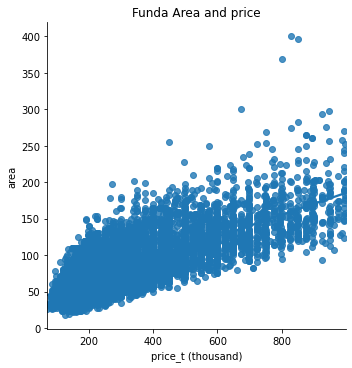

In [5]:
sns.lmplot(x='price_t', y='area', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Funda Area and price')
plt.xlabel('price_t (thousand)')
plt.ylabel('area')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 27983.93 + 3498.81X


In [14]:
lm.predict([[70]]) 
df['predict_price'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(100)

predict = df.loc[df['area'] == 70]

predict.head()


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_t,predict_price
7321,7321,Dalsteindreef 324,70,1,1102 WZ,5-5-2015,110000,apartment,2,14-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1985,110.0,272900.935073
8570,8570,Grubbehoeve 519,70,2,1103 GZ,4-2-2015,115000,apartment,3,2-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1970,115.0,272900.935073
8591,8591,Kolfschotenstraat 42,70,2,1104 PA,24-7-2014,115000,apartment,3,8-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1981,115.0,272900.935073
2603,2603,Kolfschotenstraat 144,70,1,1104 PC,2-5-2015,119000,apartment,2,28-1-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1984,119.0,272900.935073
3424,3424,Leerdamhof 212,70,2,1108 BT,4-4-2012,122500,apartment,3,29-3-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1979,122.5,272900.935073


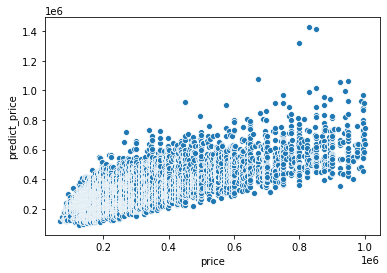

In [21]:
sns.scatterplot(x='price',y='predict_price',data=df)

plt.show()

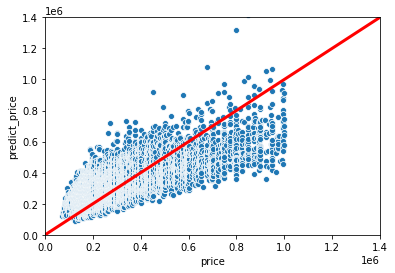

In [35]:
sns.scatterplot(x='price',y='predict_price',data=df)
plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish

plt.show()

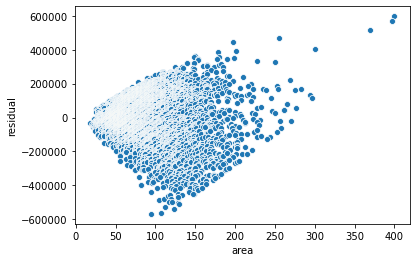

In [37]:
df['residual'] = df['predict_price'] - df['price']
sns.scatterplot(x='area', y='residual', data=df) #fit_reg=False leaves out the regression line; see below
plt.show()

In [33]:
r2_score(df['price'], df['predict_price']) #this gives the model fit (R2) for the Y and predicted Y


0.5257421182315432

In [34]:
math.sqrt(mean_squared_error(df['price'], df['predict_price'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022